<b>(注意)古いseabornのversionかつ読み込みデータも欠損が増えているので実行できないセルもあり</b>

引用
- https://qiita.com/shizuma/items/448140c2da10b4616f50
https://vaaaaaanquish.hatenablog.com/entry/2017/10/29/181949
- https://www.kaggle.com/narimiran/exploratory-visualizations
- https://qiita.com/ryo111/items/bf24c8cf508ad90cfe2e

# 準備

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
print(sns.__version__)

0.12.2


In [2]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sns.set_style('whitegrid')

In [76]:
survey_df = pd.read_csv("https://raw.githubusercontent.com/freeCodeCamp/2016-new-coder-survey/master/clean-data/2016-FCC-New-Coders-Survey-Data.csv")

/tmp/ipykernel_613/3655574728.py:1: DtypeWarning: Columns (21,57) have mixed types. Specify dtype option on import or set low_memory=False.
  survey_df = pd.read_csv("https://raw.githubusercontent.com/freeCodeCamp/2016-new-coder-survey/master/clean-data/2016-FCC-New-Coders-Survey-Data.csv")


In [77]:
survey_df.head(3)

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN


In [5]:
for col in survey_df.columns:
    print("{0} 【{1}】" .format(col, survey_df[col].dtypes))

Age 【float64】
AttendedBootcamp 【float64】
BootcampFinish 【float64】
BootcampFullJobAfter 【float64】
BootcampLoanYesNo 【float64】
BootcampMonthsAgo 【float64】
BootcampName 【object】
BootcampPostSalary 【float64】
BootcampRecommend 【float64】
ChildrenNumber 【float64】
CityPopulation 【object】
CodeEventBootcamp 【float64】
CodeEventCoffee 【float64】
CodeEventConferences 【float64】
CodeEventDjangoGirls 【float64】
CodeEventGameJam 【float64】
CodeEventGirlDev 【float64】
CodeEventHackathons 【float64】
CodeEventMeetup 【float64】
CodeEventNodeSchool 【float64】
CodeEventNone 【float64】
CodeEventOther 【object】
CodeEventRailsBridge 【float64】
CodeEventRailsGirls 【float64】
CodeEventStartUpWknd 【float64】
CodeEventWomenCode 【float64】
CodeEventWorkshop 【float64】
CommuteTime 【float64】
CountryCitizen 【object】
CountryLive 【object】
EmploymentField 【object】
EmploymentFieldOther 【object】
EmploymentStatus 【object】
EmploymentStatusOther 【object】
ExpectedEarning 【float64】
FinanciallySupporting 【float64】
Gender 【object】
HasChildren 【

# 各項目の概観

## Gender

### countplot
- ヒストグラム

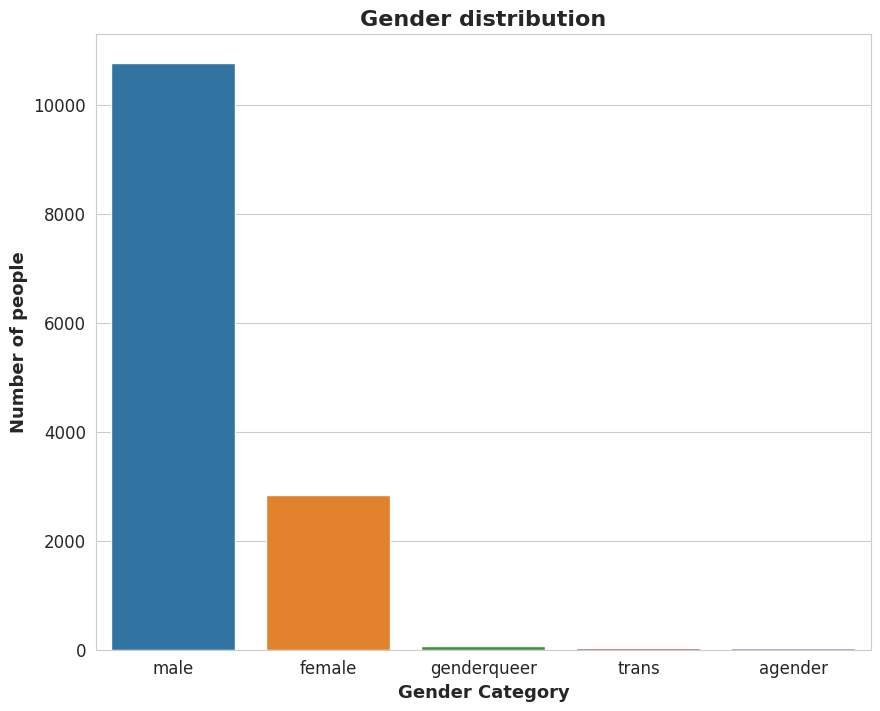

In [8]:
ax = sns.countplot(x='Gender', data=survey_df)

_ = (ax.set_title('Gender distribution'),
     ax.set_xlabel('Gender Category'),
     ax.set_ylabel('Number of people'),
#      ax.set_ylim(0, 200000),
#      ax.set_yticks(np.linspace(0, 200000, 11)),
    )

*単純なヒストグラムならmatplotlibのplt.histが便利<br>
（棒グラフを作るplt.barもありますが、データの頻度分布からヒストグラムを作るときはplt.histが楽。)

(array([ 4.,  6., 11., 15., 23., 15., 14.,  7.,  3.,  2.]),
 array([-2.44801033, -1.89558737, -1.34316442, -0.79074147, -0.23831852,
         0.31410444,  0.86652739,  1.41895034,  1.97137329,  2.52379624,
         3.0762192 ]),
 <BarContainer object of 10 artists>)

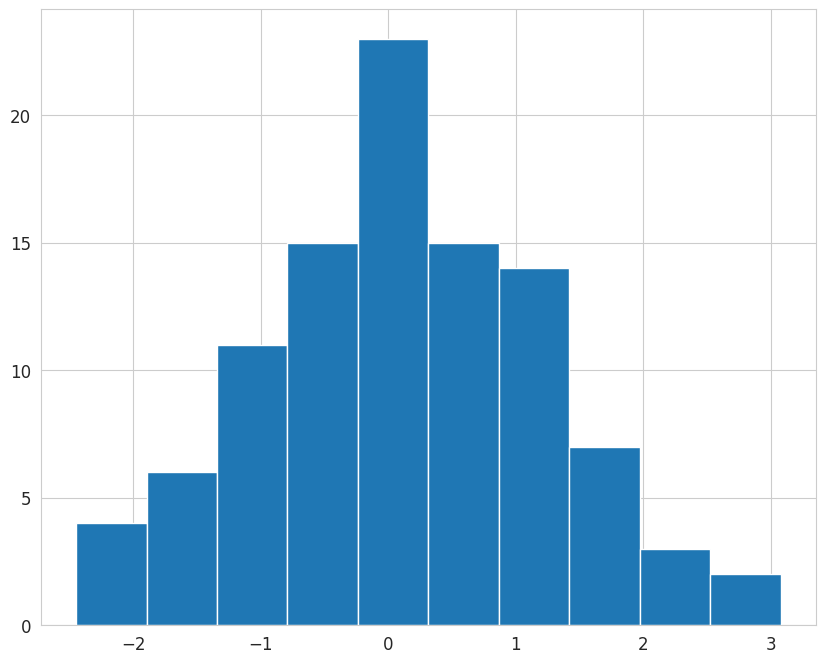

In [9]:
dataset = randn(100)
plt.hist(dataset)

色々なオプションもある

(array([0.05430622, 0.08145932, 0.13576554, 0.21722486, 0.21722486,
        0.27153108, 0.46160283, 0.29868419, 0.27153108, 0.24437797,
        0.19007175, 0.13576554, 0.08145932, 0.02715311, 0.02715311]),
 array([-2.44801033, -2.07972836, -1.71144639, -1.34316442, -0.97488245,
        -0.60660049, -0.23831852,  0.12996345,  0.49824542,  0.86652739,
         1.23480936,  1.60309132,  1.97137329,  2.33965526,  2.70793723,
         3.0762192 ]),
 <BarContainer object of 15 artists>)

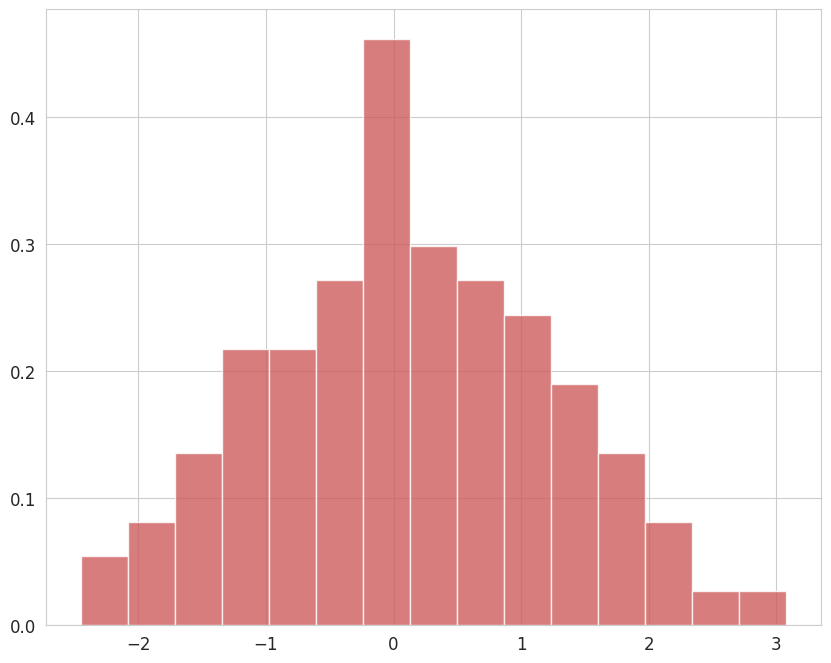

In [12]:
# density: 正規化, alpha: 透明度, color: 色, bins: ビン数
plt.hist(dataset, density=True, alpha=0.8, color='indianred', bins=15)

## HasChildren

### countplot
- 子供の有無

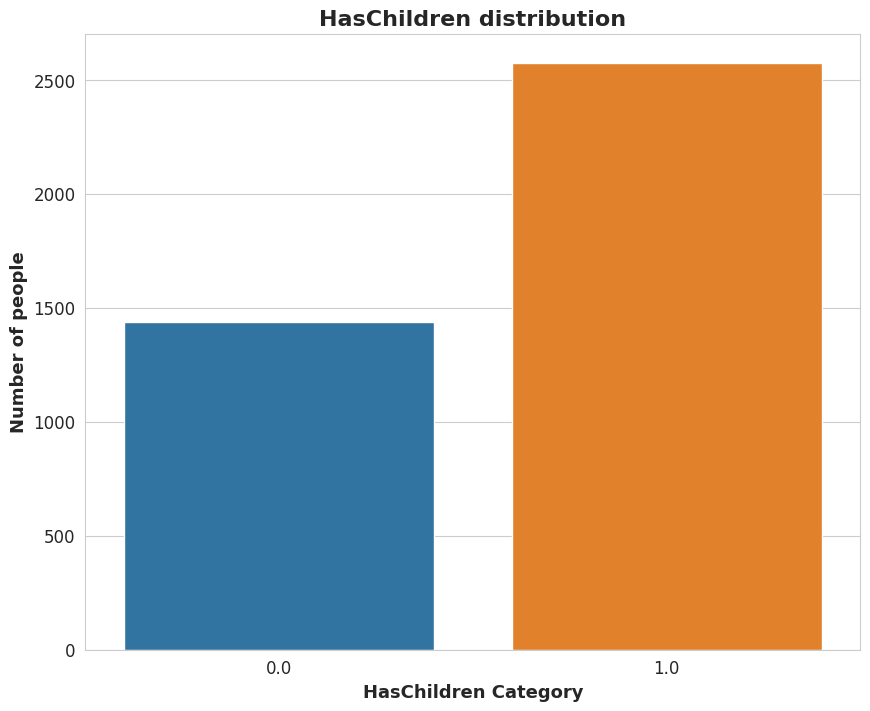

In [14]:
ax = sns.countplot(x='HasChildren', data=survey_df)

_ = (ax.set_title('HasChildren distribution'),
     ax.set_xlabel('HasChildren Category'),
     ax.set_ylabel('Number of people'),
    )

0か1だと分かりにくいので『子供なし』、『子供あり』にデータを変換

In [15]:
survey_df['HasChildren'].loc[survey_df['HasChildren'] == 0] = 'No'
survey_df['HasChildren'].loc[survey_df['HasChildren'] == 1] = 'Yes'

/tmp/ipykernel_613/2537846505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['HasChildren'].loc[survey_df['HasChildren'] == 0] = 'No'


<Axes: xlabel='HasChildren', ylabel='count'>

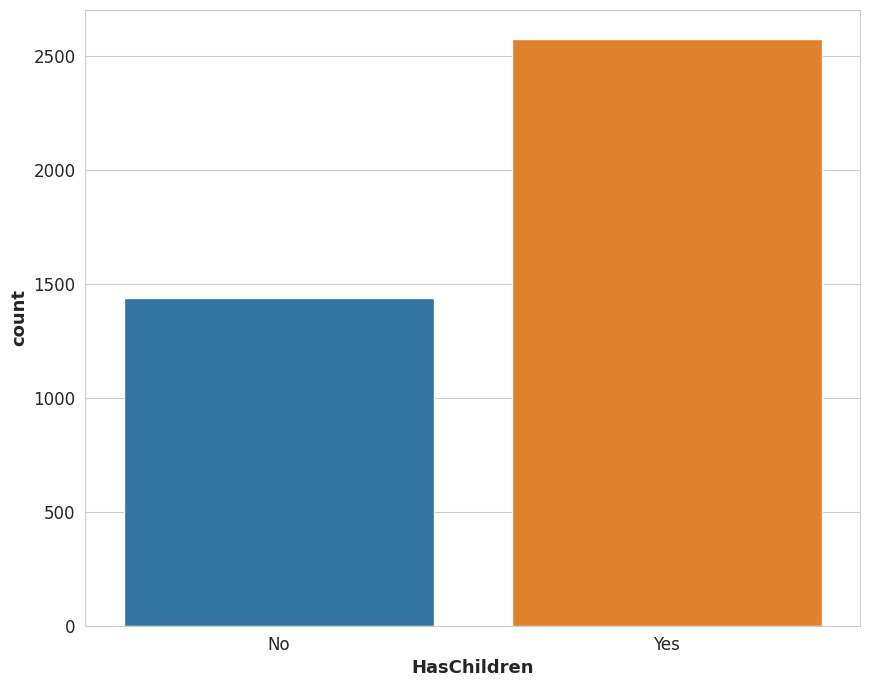

In [17]:
sns.countplot(x='HasChildren', data=survey_df)

### map

mapを使った変換の方が便利

In [24]:
# survey_df['HasChildren'] = survey_df['HasChildren'].map({0: 'No', 1: 'Yes'})
# sns.countplot(x='HasChildren', data=survey_df)

## EmploymentStatus

### countplot

雇用形態

<Axes: xlabel='EmploymentStatus', ylabel='count'>

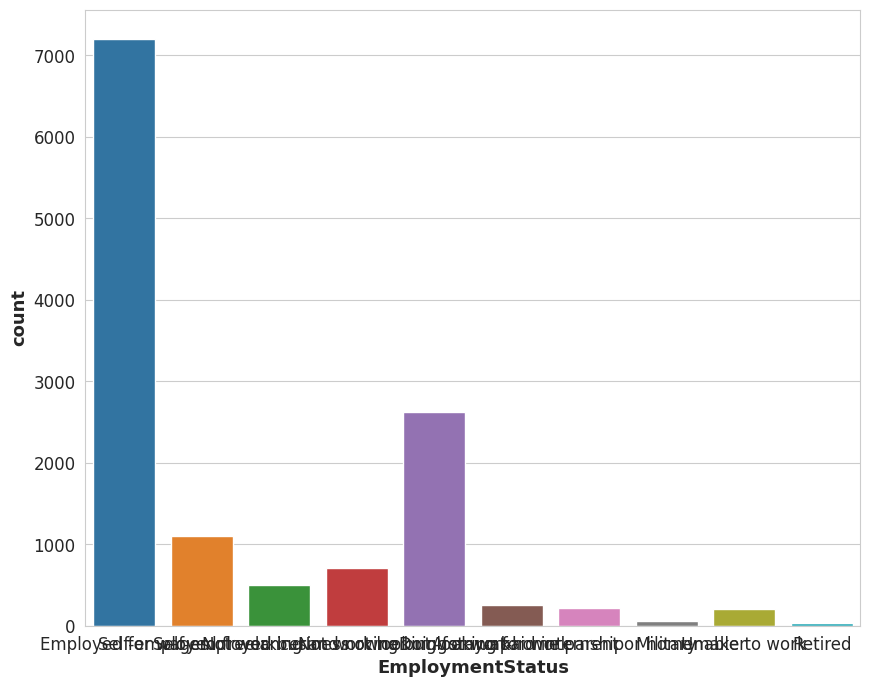

In [25]:
sns.countplot(x='EmploymentStatus', data=survey_df)

軸がごちゃごちゃしているので向きを変えてみる。

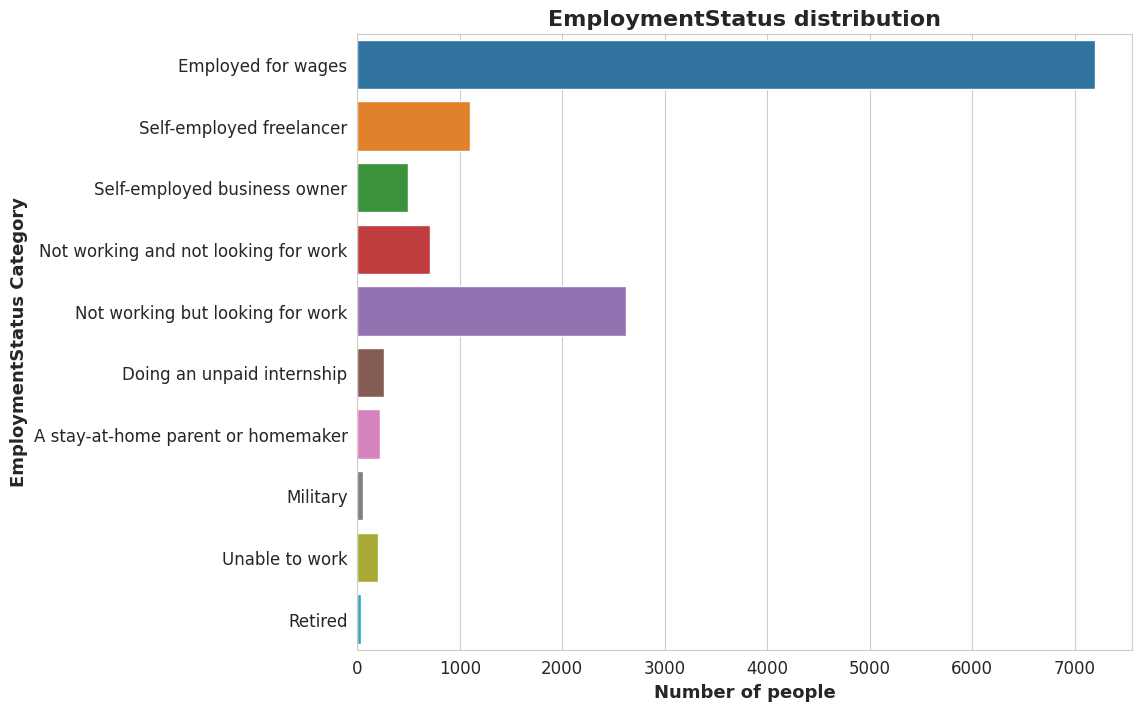

In [26]:
ax = sns.countplot(y='EmploymentStatus', data=survey_df)

_ = (ax.set_title('EmploymentStatus distribution'),
     ax.set_xlabel('Number of people'),
     ax.set_ylabel('EmploymentStatus Category'),
#      ax.set_ylim(0, 200000),
#      ax.set_yticks(np.linspace(0, 200000, 11)),
    )

## Age

### countplot

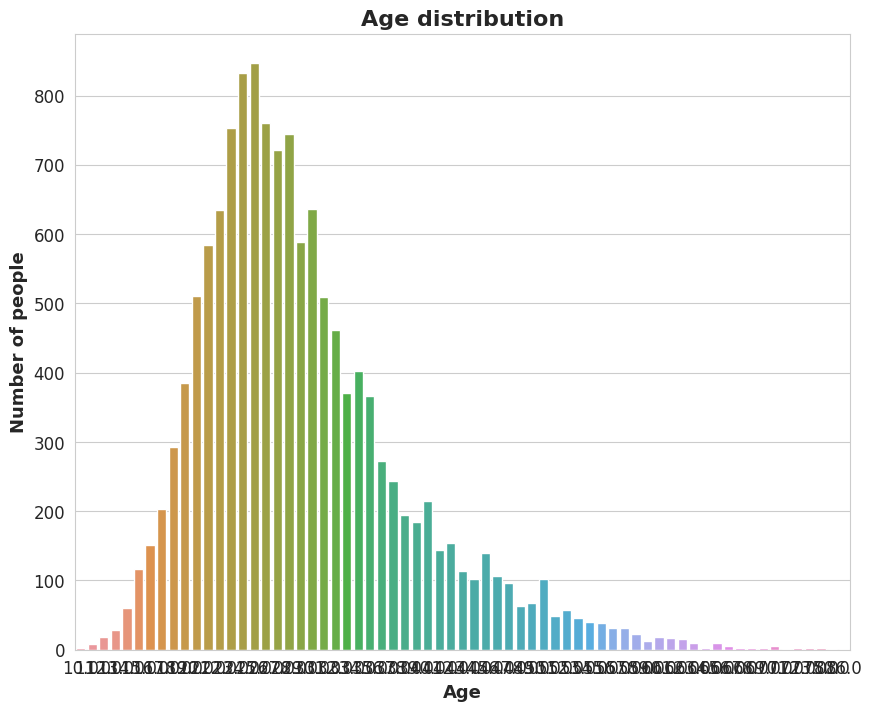

In [28]:
ax = sns.countplot(x='Age', data=survey_df)

_ = (ax.set_title('Age distribution'),
     ax.set_xlabel('Age'),
     ax.set_ylabel('Number of people'),
#      ax.set_ylim(0, 200000),
#      ax.set_yticks(np.linspace(0, 200000, 11)),
    )

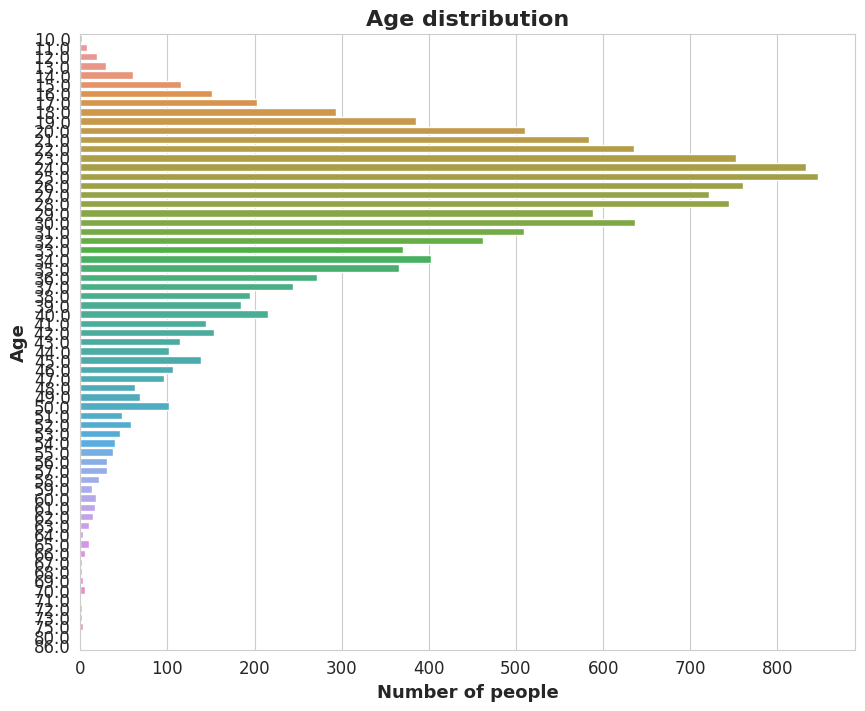

In [29]:
ax = sns.countplot(y = 'Age', data=survey_df)

_ = (ax.set_title('Age distribution'),
     ax.set_xlabel('Number of people'),
     ax.set_ylabel('Age'),
#      ax.set_ylim(0, 200000),
#      ax.set_yticks(np.linspace(0, 200000, 11)),
    )

ごちゃごちゃして見づらい...

### kde plot

カーネル密度推定 ( kde: kernel density plot ) </br>
データ標本から確率密度関数を推定する手法の一つ。</br>
正規分布やガンマ分布などを使ったパラメトリックモデルを想定した手法と、カーネル密度推定(Kernel density estimation: KDE)を代表としたノンパラメトリックな推定手法がある。

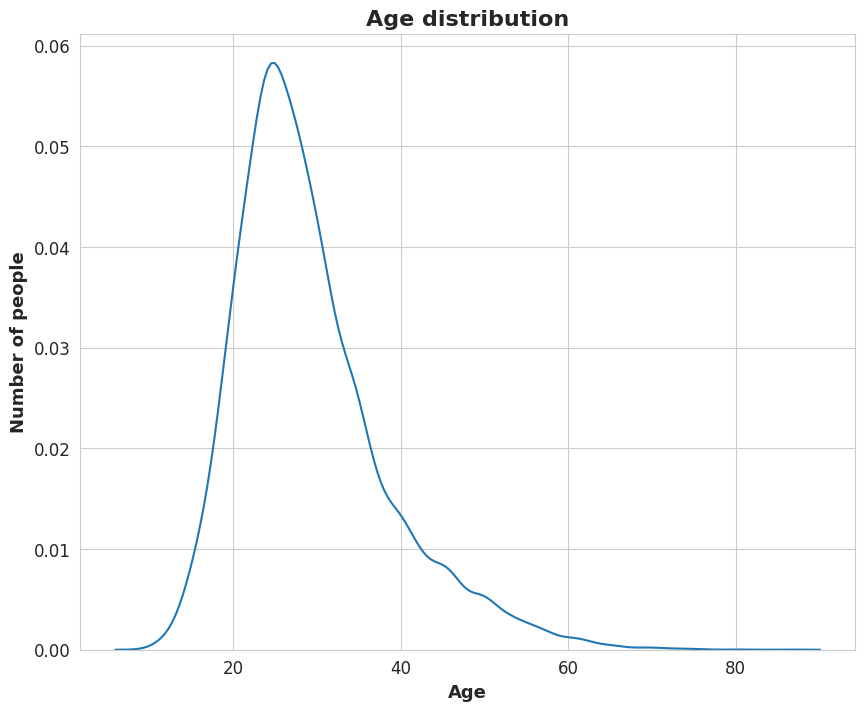

In [30]:
ax = sns.kdeplot(survey_df['Age'])

_ = (ax.set_title('Age distribution'),
     ax.set_xlabel('Age'),
     ax.set_ylabel('Number of people'),
#      ax.set_ylim(0, 200000),
#      ax.set_yticks(np.linspace(0, 200000, 11)),
    )

- 20代から30代が最頻値
- 右に裾野が広がった形状

Ageが連続型だと使いにくいのでカテゴリ型に変換してみる。

In [31]:
survey_df['AgeGroups'] = pd.cut(survey_df.Age, [0, 21, 25, 30, 40, 99], 
                                 labels=['10-20', '21-24', '25-29', '30-39', '40-86'],
                                 right=False)

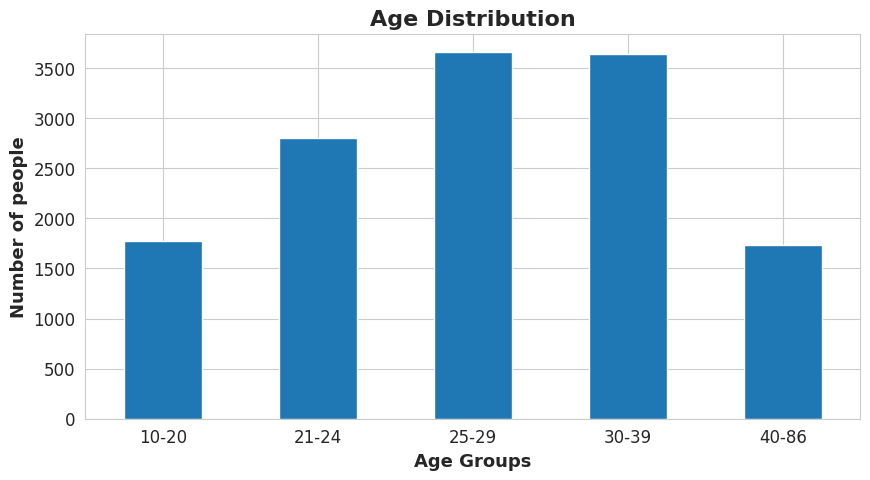

In [32]:
ax = survey_df.AgeGroups.value_counts(sort=False).plot(kind='bar', rot=0, figsize=(10,5))

_ = (ax.set_title('Age Distribution'),
     ax.set_xlabel('Age Groups'),
     ax.set_ylabel('Number of people'))

## Income

### kde plot

<Axes: xlabel='Income', ylabel='Density'>

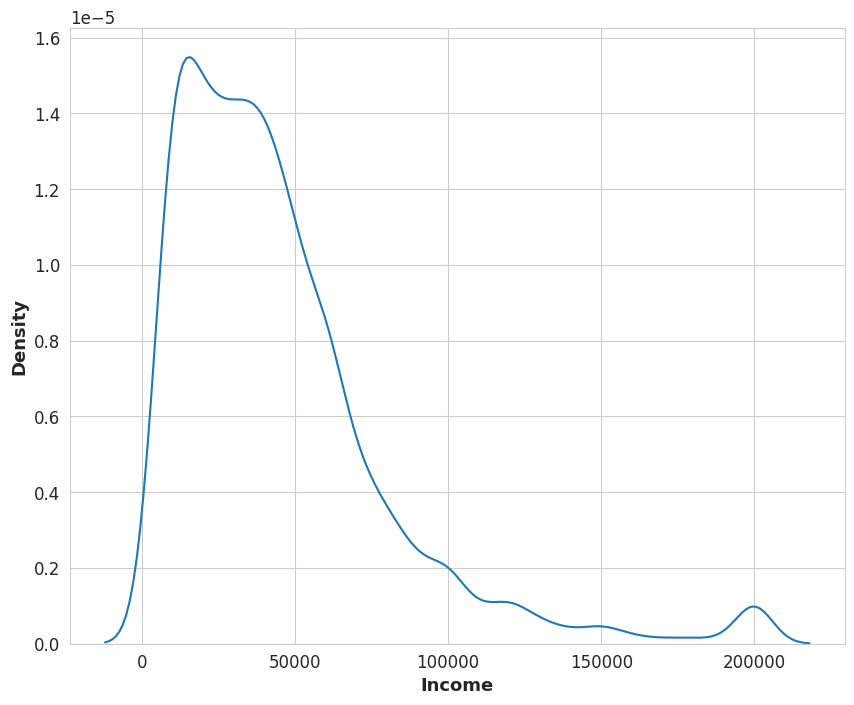

In [33]:
sns.kdeplot(survey_df['Income'])

- 年収かな？

### describe

In [34]:
survey_df['Income'].describe()

count      7329.000000
mean      44930.010506
std       35582.783216
min        6000.000000
25%       20000.000000
50%       37000.000000
75%       60000.000000
max      200000.000000
Name: Income, dtype: float64

### boxplot

<Axes: >

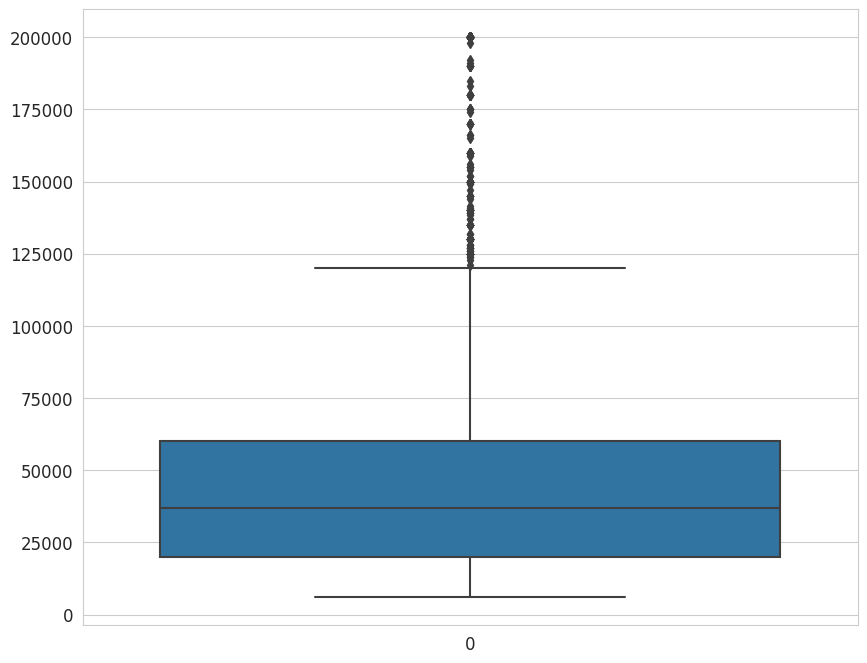

In [35]:
sns.boxplot(survey_df['Income'])

左の縦線から順に箱ひげの最小、第一四分位点(Q1)、中央値、第三四分位点（Q3)、箱ひげの最大を表す。</br>
IQR = Q3-Q1 として (最小値 - IQR1.5) ~ (最大値 + IQR1.5 ) から外れたものを箱ひげから外れた外れ値として黒の点で表す。

外れ値をなしで表現することも可能。

<Axes: >

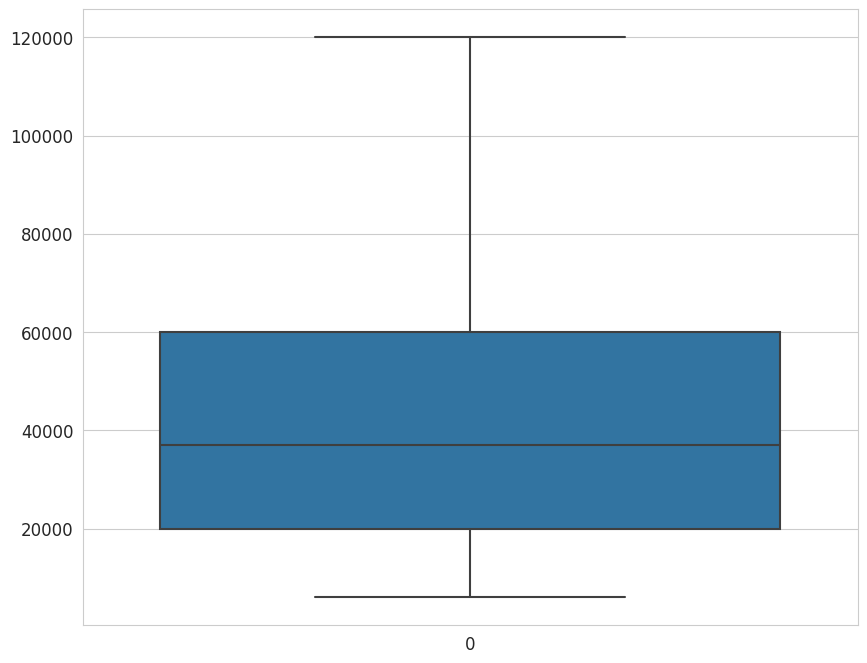

In [36]:
sns.boxplot(survey_df['Income'], sym="")

また、別の変数を仕切りにbox plotを描写することも可能。</br>
</br>
性別毎のincomeをbox plot。

<Axes: xlabel='Gender', ylabel='Income'>

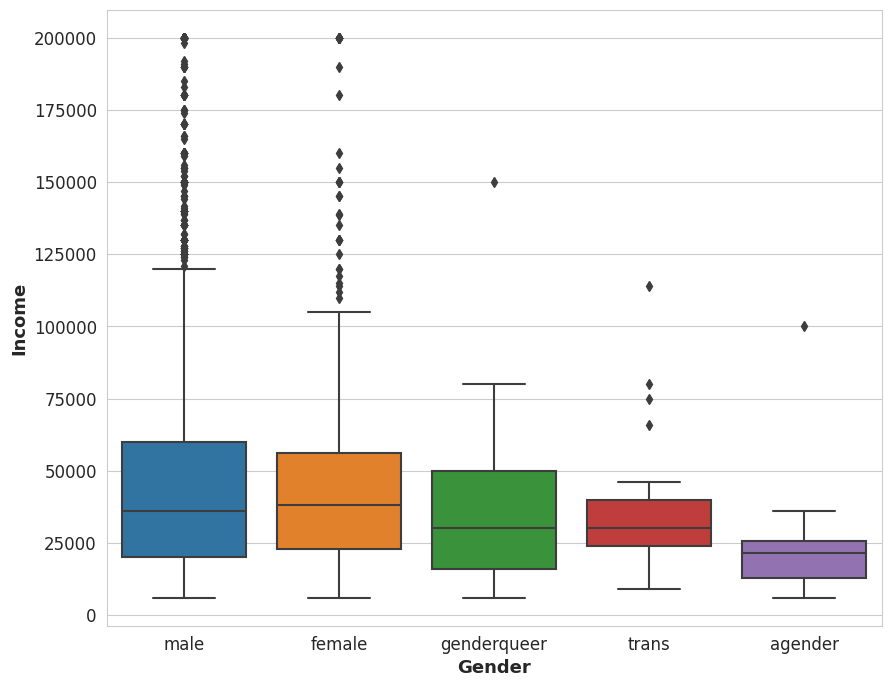

In [37]:
sns.boxplot(x="Gender", y="Income", data=survey_df)

x, yを入れ替えたり外れ値除去も可能。

<Axes: xlabel='Income', ylabel='Gender'>

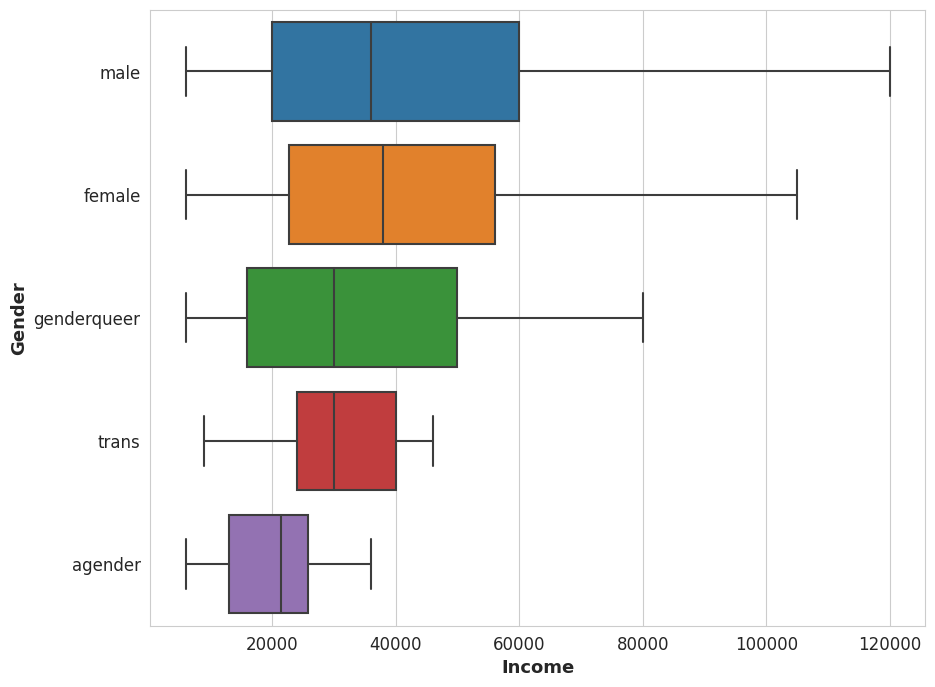

In [38]:
sns.boxplot(y="Gender", x="Income", data=survey_df, sym="")

### violinplot

boxplotにkdeの情報を持たせたヴァヴィオリンプロットというものもあります。

<Axes: >

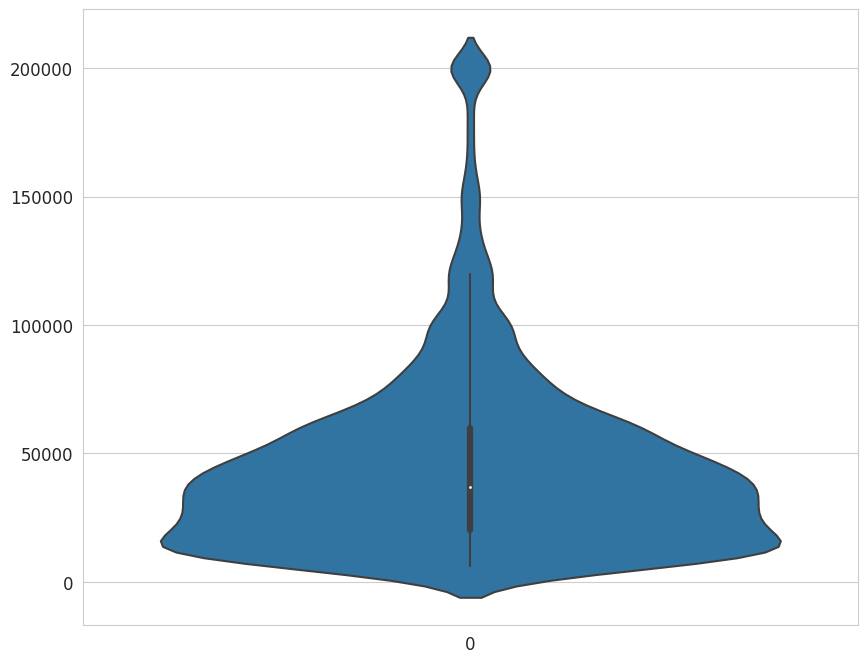

In [39]:
sns.violinplot(survey_df['Income'])

## HoursLearning
学習時間

<Axes: xlabel='HoursLearning', ylabel='Density'>

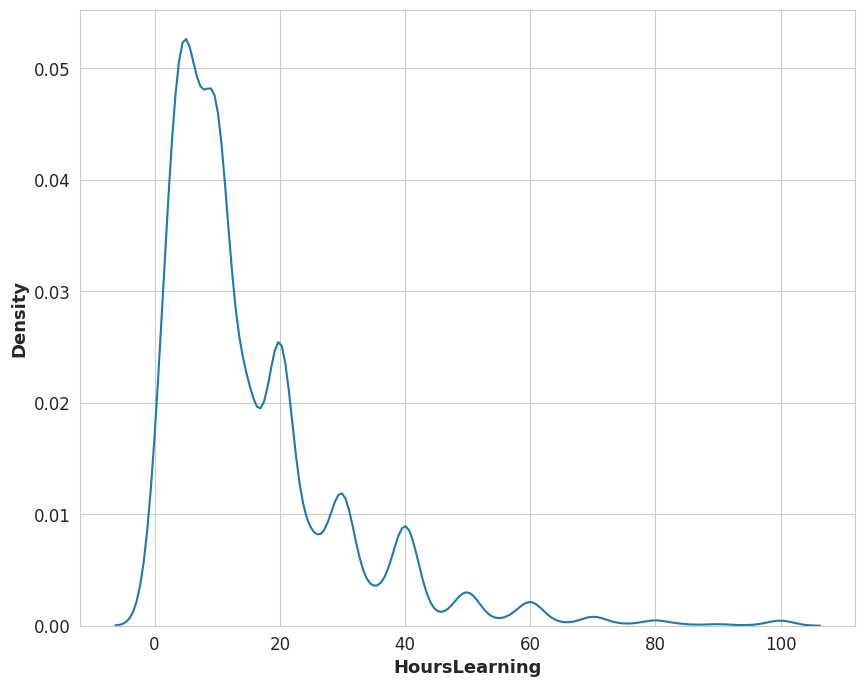

In [40]:
sns.kdeplot(survey_df['HoursLearning'])

- 1週間の学習量?
- 極値が目立つ - きりの良い数字でアンケートに答えている？

### distplot

データの分布を把握したい際に利用します。</br>
countplotとkdeplotの両方を一緒に生成する。

/tmp/ipykernel_613/324087781.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hours_learning)


<Axes: xlabel='HoursLearning', ylabel='Density'>

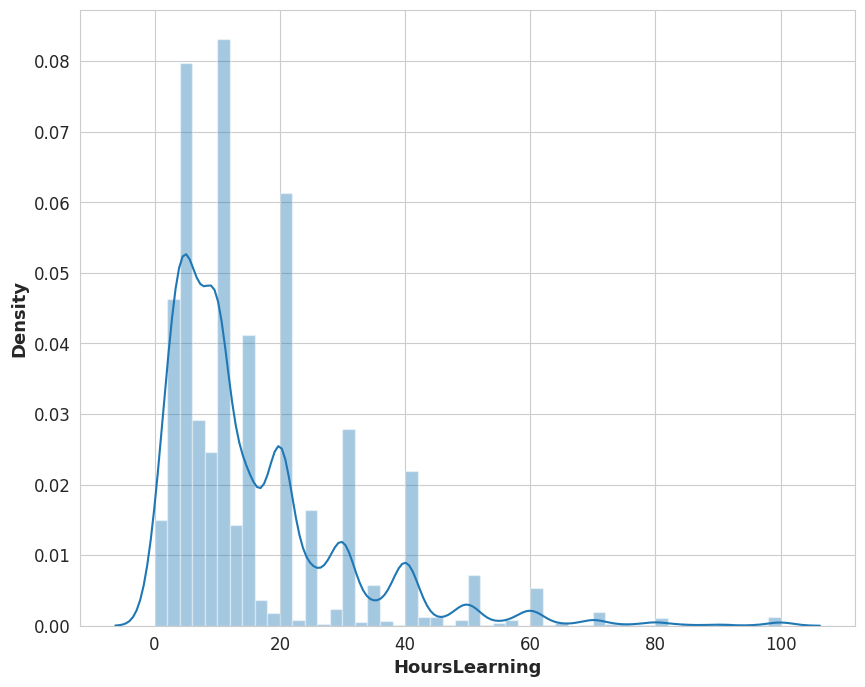

In [41]:
hours_learning = survey_df['HoursLearning']
hours_learning = hours_learning.dropna()
sns.distplot(hours_learning)

### lmplot

散布図によって学習時間と年収に相関があるか確認

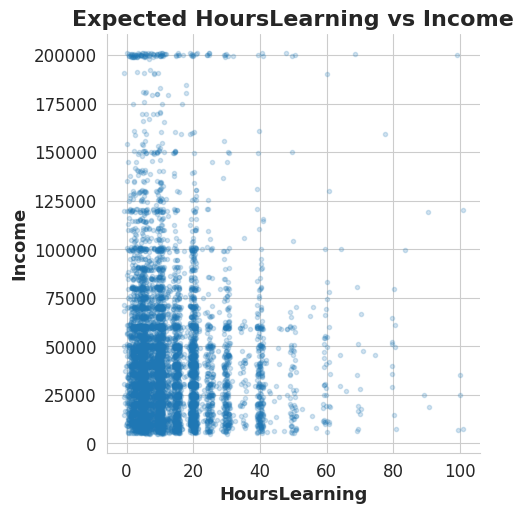

In [45]:
fig = sns.lmplot(data=survey_df, x='HoursLearning', y='Income',
                 fit_reg=False, x_jitter=1, y_jitter=1000,
                 scatter_kws={'s': 9,'alpha':0.2})
# x_jitter=1, y_jitter=1000　で乱数をつけて可視化しやすくしている

_ = (fig.ax.set_title('Expected HoursLearning vs Income'),
     fig.ax.set_xlabel('HoursLearning'),
     fig.ax.set_ylabel('Income'),
#      fig.ax.set_xlim(10, 60.05),
#      fig.ax.set_ylim(0, 120000),
    )

あまりきれいな感じではないが...</br>
</br>
回帰線も加えてみる。

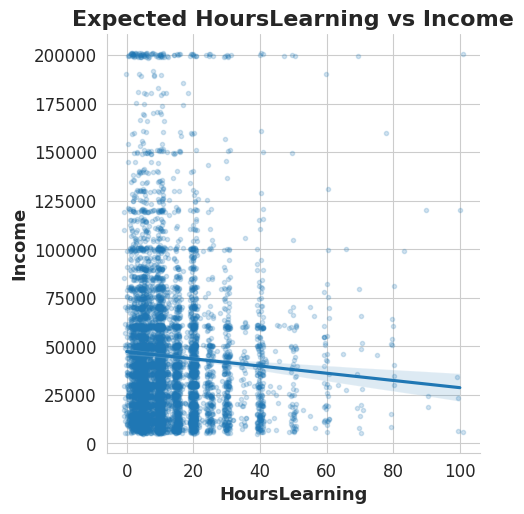

In [46]:
fig = sns.lmplot(data=survey_df, x='HoursLearning', y='Income',
                 fit_reg=True, x_jitter=1, y_jitter=1000,
                 scatter_kws={'s': 9,'alpha':0.2})

_ = (fig.ax.set_title('Expected HoursLearning vs Income'),
     fig.ax.set_xlabel('HoursLearning'),
     fig.ax.set_ylabel('Income'),
#      fig.ax.set_xlim(10, 60.05),
#      fig.ax.set_ylim(0, 120000),
    )

弱い負の相関が見られる。</br>
学生のデータも入っているせい?

## SchoolMajor

離散型なのでcountplotを使います。

<Axes: xlabel='count', ylabel='SchoolMajor'>

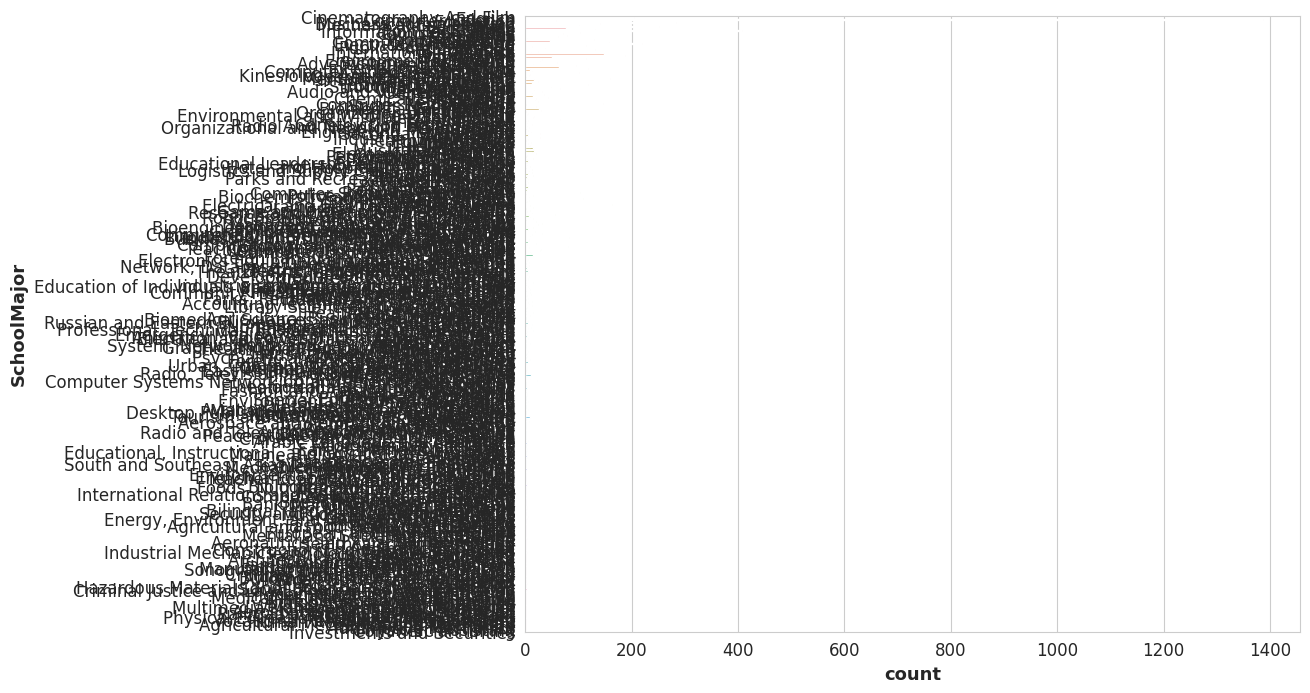

In [47]:
sns.countplot(y='SchoolMajor' , data=survey_df)

見にくいです。。カテゴリ数が多すぎるのですね。
上位10個くらいが見たいです。

### collections.Counter

標準ライブラリのcollectionsを使うことでカウントします。</br>
さらにmost_common(10)とすることでその中の上位10件を取得することが出来ます。

In [48]:
from collections import Counter
major_count = Counter(survey_df['SchoolMajor'])
major_count.most_common(10)

[(nan, 7170),
 ('Computer Science', 1387),
 ('Information Technology', 408),
 ('Business Administration', 284),
 ('Economics', 252),
 ('Electrical Engineering', 220),
 ('English', 204),
 ('Psychology', 187),
 ('Electrical and Electronics Engineering', 164),
 ('Software Engineering', 159)]

グラフに表示

([<matplotlib.axis.YTick at 0x7fac316308b0>,
 [Text(0, 0, 'nan'),
  Text(0, 1, 'Computer Science'),
  Text(0, 2, 'Information Technology'),
  Text(0, 3, 'Business Administration'),
  Text(0, 4, 'Economics'),
  Text(0, 5, 'Electrical Engineering'),
  Text(0, 6, 'English'),
  Text(0, 7, 'Psychology'),
  Text(0, 8, 'Electrical and Electronics Engineering'),
  Text(0, 9, 'Software Engineering')])

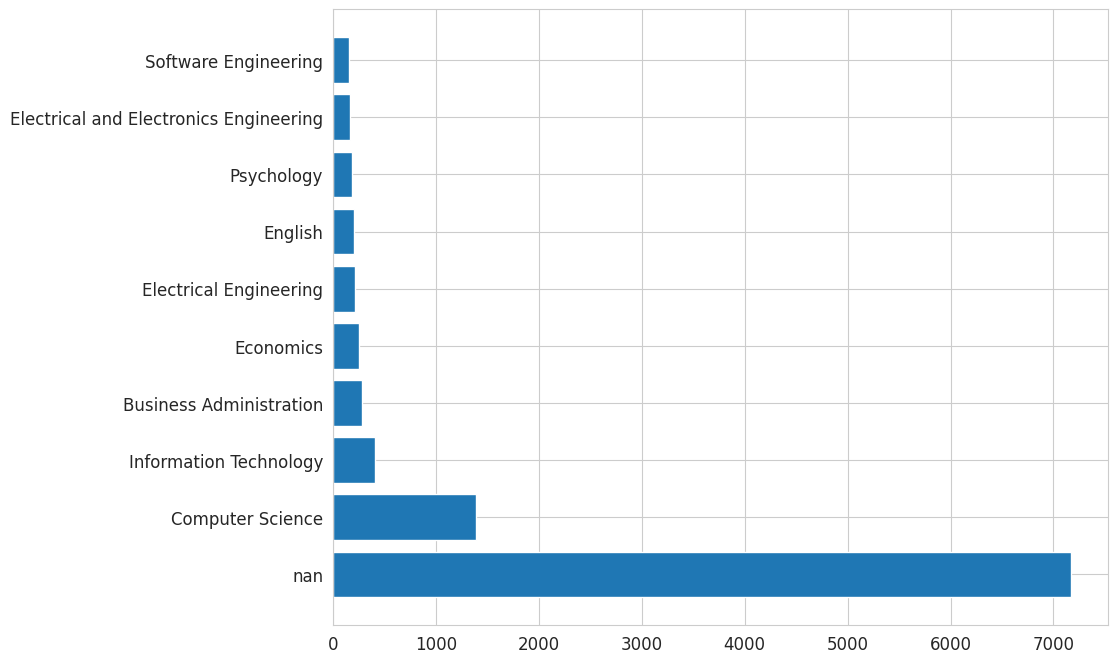

In [49]:
X = []
Y = []
major_count_top10 = major_count.most_common(10)
for record in major_count_top10:
    X.append(record[0])
    Y.append(record[1])

# [nan, 'Computer Science', 'Information Technology', 'Business Administration', 'Economics', 'Electrical Engineering', 'English', 'Psychology', 'Electrical and Electronics Engineering', 'Software Engineering']
# [7170, 1387, 408, 284, 252, 220, 204, 187, 164, 159]

# plt.bar() の代わりに plt.barh() を使うと横向き (horizontal) のグラフ
plt.barh(np.arange(10), Y)
# ラベル追加
plt.yticks(np.arange(10), X)

- plt.barhを使うとplt.barの軸を変えることが出来る</br>
- yticksを使ってラベルもつける</br>
さて、nanは表示させたくないですし、逆順に並び替えたいです。

([<matplotlib.axis.YTick at 0x7fac2aedbbb0>,
 [Text(0, 0, 'Liberal Arts'),
  Text(0, 1, 'Software Engineering'),
  Text(0, 2, 'Electrical and Electronics Engineering'),
  Text(0, 3, 'Psychology'),
  Text(0, 4, 'English'),
  Text(0, 5, 'Electrical Engineering'),
  Text(0, 6, 'Economics'),
  Text(0, 7, 'Business Administration'),
  Text(0, 8, 'Information Technology'),
  Text(0, 9, 'Computer Science')])

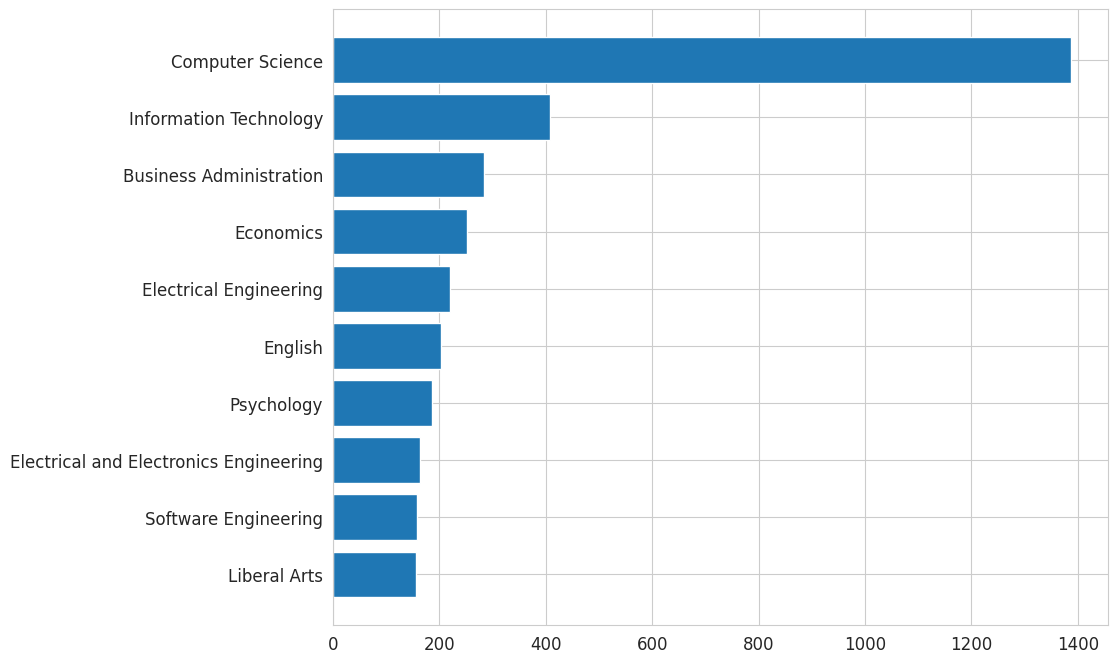

In [50]:
X = []
Y = []
major_count_top10 = major_count.most_common(11)
major_count_top10.reverse()
for record in major_count_top10:
    # record[0]にnullが入った場合 falseになる
    if pd.notnull(record[0]):
        X.append(record[0])
        Y.append(record[1])

# ['Liberal Arts','Software Engineering', 'Electrical and Electronics Engineering', 'Psychology', 'English', 'Electrical Engineering', 'Economics', 'Business Administration', 'Information Technology', 'Computer Science']
# [157, 159, 164, 187, 204, 220, 252, 284, 408, 1387]

plt.barh(np.arange(len(Y)), Y)
plt.yticks(np.arange(len(X)), X)

# データ同士の関連性

## Gender と HasChildren

まず、Genderは簡単のために男女だけにします。

In [55]:
male_female_df = survey_df[(survey_df['Gender'] == 'male') | (survey_df['Gender'] == 'female')]

countplotのhueを使うことで層別にカウントすることができます。

### countplot(hue)

In [56]:
sns.countplot(x='Gender', data=male_female_df, hue='HasChildren')

ValueError: min() arg is an empty sequence

## Gender と Age

countplot以外のグラフでも層別に表すことが出来ます。FacetGridを使います。

### sns.FacetGrid

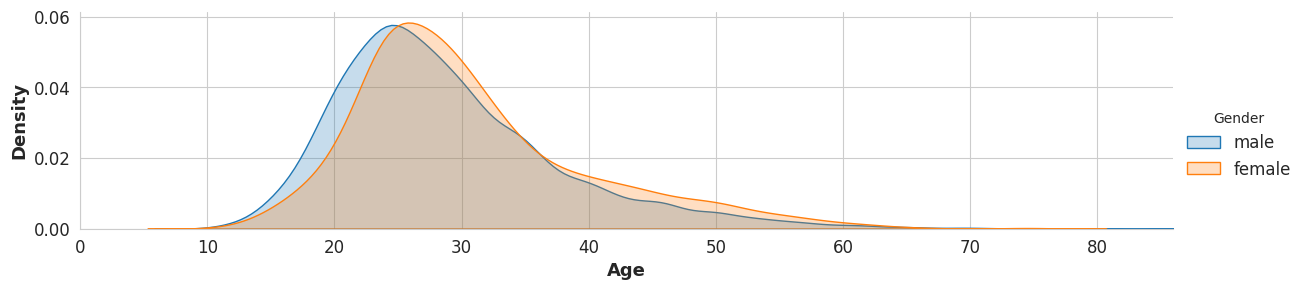

In [58]:
fig = sns.FacetGrid(male_female_df, hue='Gender', aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)
oldest = male_female_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

- 若干男性のほうが若い側にある

## EmploymentStatus と Gender

EmploymentStatusは複数あるので上位の数件だけ使う。

[('Employed for wages', 7114), ('Not working but looking for work', 2589), ('Self-employed freelancer', 1080), (nan, 885), ('Not working and not looking for work', 689)]


<Axes: xlabel='count', ylabel='EmploymentStatus'>

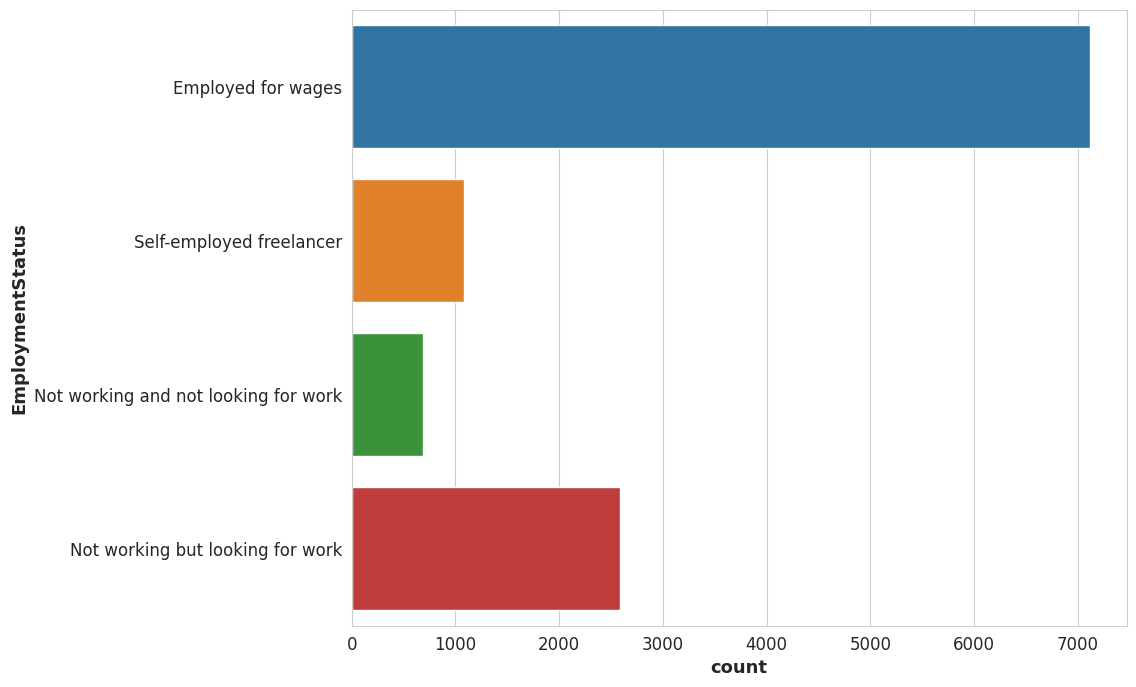

In [59]:
# male_female_dfは survey_dfのGenderを男女に絞ったもの
# EmploymentStatusの上位5件を取得
from collections import Counter
employ_count = Counter(male_female_df['EmploymentStatus'])
employ_count_top = employ_count.most_common(5)
print(employ_count_top)
employ_list =[]

for record in employ_count_top:
     if pd.notnull(record[0]):
        employ_list.append(record[0])

def top_employ(status):
    return status in employ_list

# applyを使ってemploy_listに入った項目の行だけを取得
new_survey_df = male_female_df.loc[male_female_df['EmploymentStatus'].apply(top_employ)]

sns.countplot(y='EmploymentStatus', data=new_survey_df)

これで上位3件の項目だけになりました。</br>
countplotのhueを使って男女の層別に見てみます。

<Axes: xlabel='count', ylabel='EmploymentStatus'>

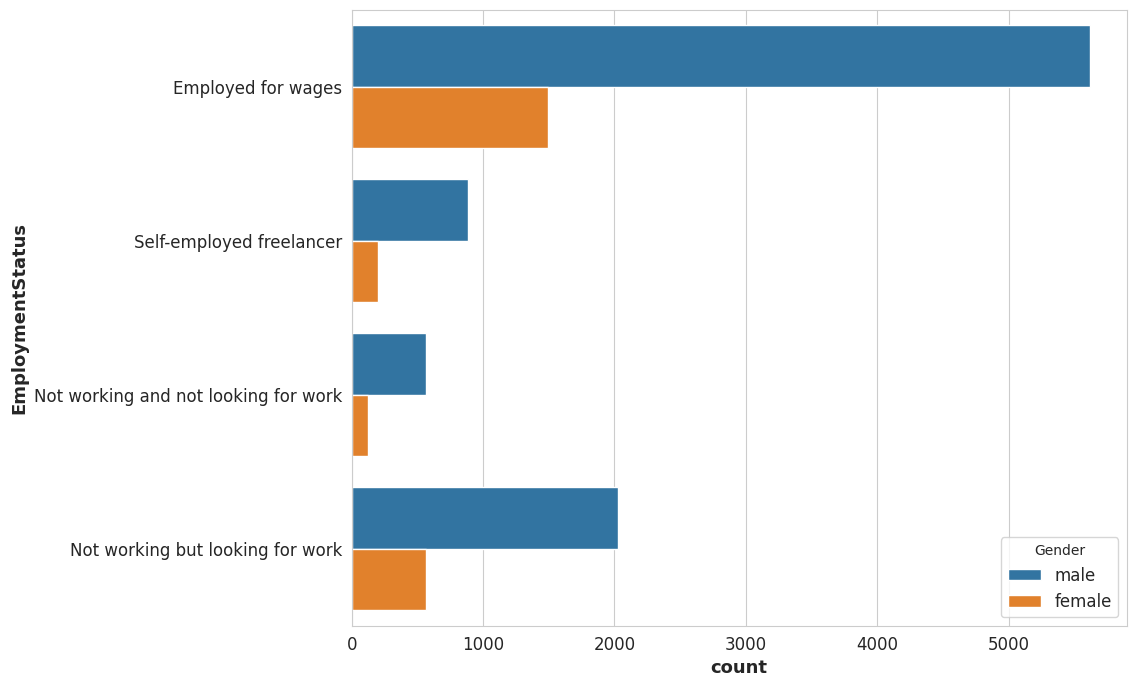

In [60]:
sns.countplot(y='EmploymentStatus', data=new_survey_df, hue='Gender')

## EmploymentStatus と HasChildren

まず、HasChildrenをNo->0, Yes->1に変換しておきます。

In [61]:
new_survey_df['HasChildren'] = new_survey_df['HasChildren'].map({'No': 0, 'Yes': 1})

/tmp/ipykernel_613/699513611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_survey_df['HasChildren'] = new_survey_df['HasChildren'].map({'No': 0, 'Yes': 1})


ここでfactorplotを使います。EmploymentStatusが子供の有無にどれくらい関わっているか見てみます。

### factorplot

In [62]:
ax = sns.factorplot('EmploymentStatus', 'HasChildren', data=new_survey_df, aspect=2)

ax.set_xticklabels(rotation=45)

AttributeError: module 'seaborn' has no attribute 'factorplot'

Emloyed for wagesが少し値が高いですね。これは納得感があります。

また、factorplotも層別に見ることが出来るので男女に違いがないか見てみます。

In [63]:
ax = sns.factorplot('EmploymentStatus',
                    'HasChildren', 
                    data=new_survey_df, aspect=2, hue='Gender')

ax.set_xticklabels(rotation=45)

AttributeError: module 'seaborn' has no attribute 'factorplot'

## Age と HasChildren

### lmplot

回帰直線で関係を見てみたいと思います。回帰直線には lmplotを使います。

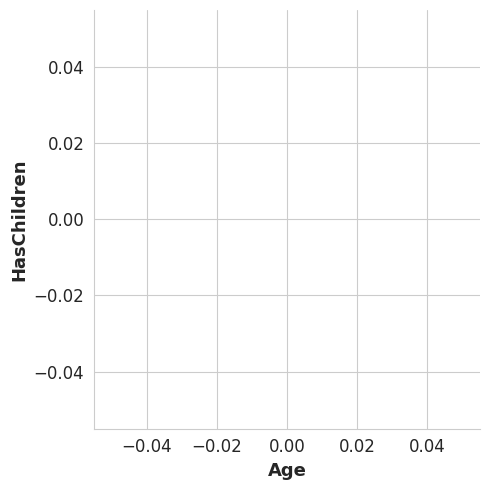

In [65]:
sns.lmplot('Age', 'HasChildren', data=new_survey_df)

さて、lmplotも層別に見ることが出来るのでやってみたいと思います。
まずはEmploymentStatusで層別にします。

In [66]:
sns.lmplot(x='Age', y='HasChildren', data=new_survey_df, hue='EmploymentStatus')

TypeError: lmplot() got multiple values for argument 'data'

一般には Employed for wagesの値が少し高いですが、前項で見たように男女で分けるともう少しはっきり分かれそうですね。

ついでに、Genderでも層別にしておきます。

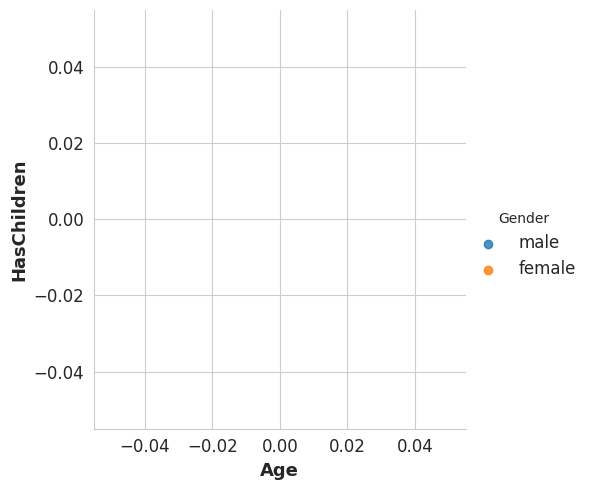

In [67]:
sns.lmplot(x='Age', y='HasChildren', data=new_survey_df, hue='Gender')

# Feature Job

## countplot

ややこしいので男女のみのデータを使用した ⇒ male_female_df

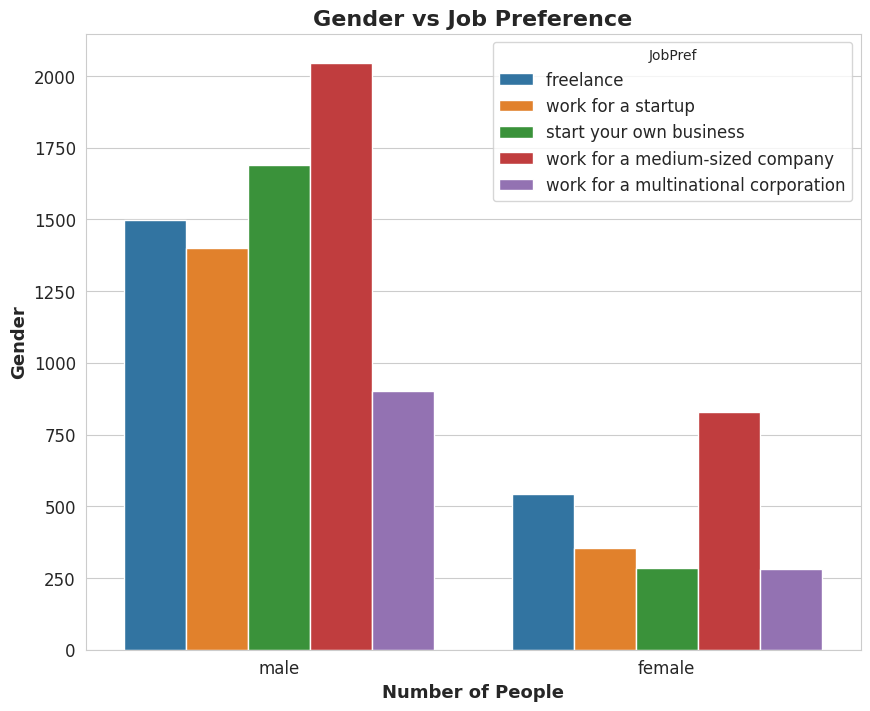

In [68]:
ax = sns.countplot(data=male_female_df, x='Gender', hue='JobPref')

_ = (ax.set_title('Gender vs Job Preference'),
     ax.set_xlabel('Number of People'),
     ax.set_ylabel('Gender'),
    )  

中規模の会社で働くことは、両方の性別にとって最も望まれる仕事です。</br>
</br>
興味深いのは、自分のビジネスを始めることです。</br>
</br>
- 男性にとって、それは2番目に人気。</br>
- 女性にとっては、それは最も望まれていない。

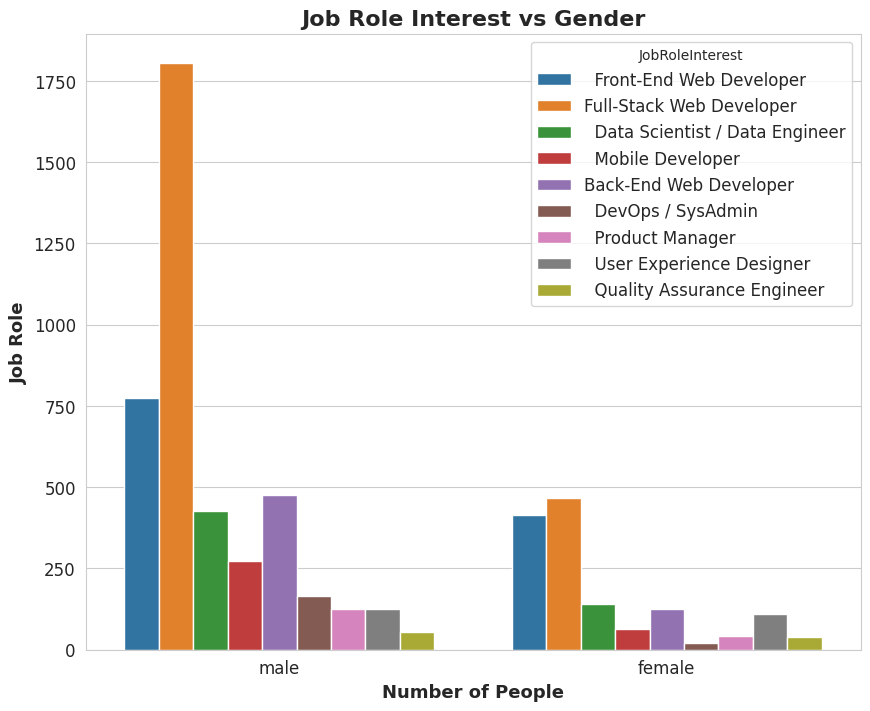

In [69]:
ax = sns.countplot(data=male_female_df, x='Gender', hue='JobRoleInterest')

_ = (ax.set_title('Job Role Interest vs Gender'),
     ax.set_xlabel('Number of People'),
     ax.set_ylabel('Job Role'),
    )

フルスタックおよびフロントエンドWeb開発は、最も興味深い職務です。最も面白くないのは品質保証です。</br>
</br>
女性はSysAdminsになることに関心がありませんが、ユーザーエクスペリエンスデザイナーになることは男性よりも重要です。

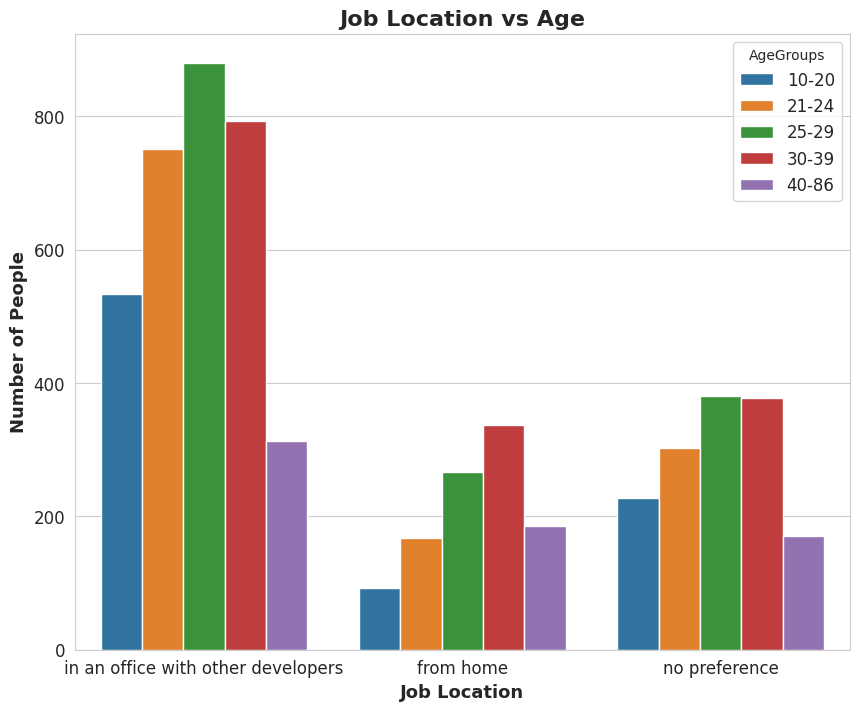

In [70]:
ax = sns.countplot(data=male_female_df, x='JobWherePref', hue='AgeGroups')

_ = (ax.set_title('Job Location vs Age'),
     ax.set_xlabel('Job Location'),
     ax.set_ylabel('Number of People'),
    )

在宅勤務は年齢が上がるにつれて人気が高まっています。

## 複数のグラフを並べて表示する

複数のグラフを並べて表示させる方法もあります。subplotsを使って2つのグラフを描画しました。

ValueError: min() arg is an empty sequence

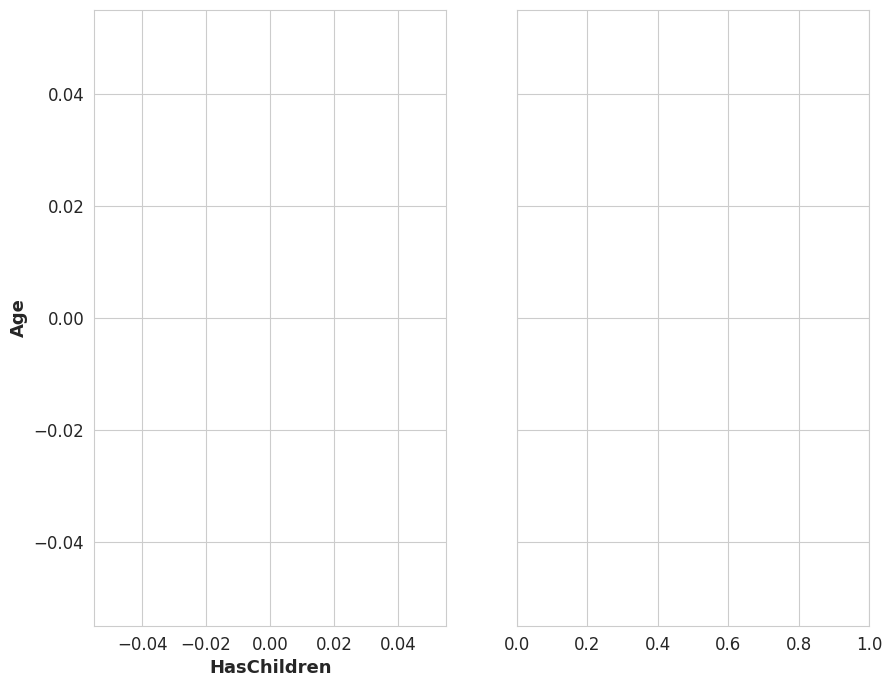

In [72]:
fig, (axis1, axis2) = plt.subplots(1, 2, sharey=True)
sns.regplot(x='HasChildren', y='Age', data=new_survey_df, ax=axis1)
sns.violinplot(y='Age', x='HasChildren', data=new_survey_df, ax=axis2)

regplotというのはlmplotの低レベルバージョンで、単純な回帰を作る上では同じです。</br>
regplotsを使ったのはsubplotsで使える関数はmatplotlib Axesオブジェクトを返すものに限られるようでlmplotが使えなかったからです。

詳しい説明は
Plotting with seaborn using the matplotlib object-oriented interface
が分かりやすかったです。

この記事でいう "Axis-level" functionは使えるようです。
(regplot, boxplot, kdeplot, and many others)

これに対して "Figure-level" functionも紹介されていてその中にlmplotもあります。
(lmplot, factorplot, jointplot and one or two others)

ほとんどAxisで一部Figureって感じですかね。

それでFigureに関してはFacetGridが良いみたいです。
Plotting on data-aware grids

FacetGridでも複数のグラフを並べられます。
Age の分布を EmploymentStatusごとに並べて表示してみました。

/opt/conda/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.8/site-packages

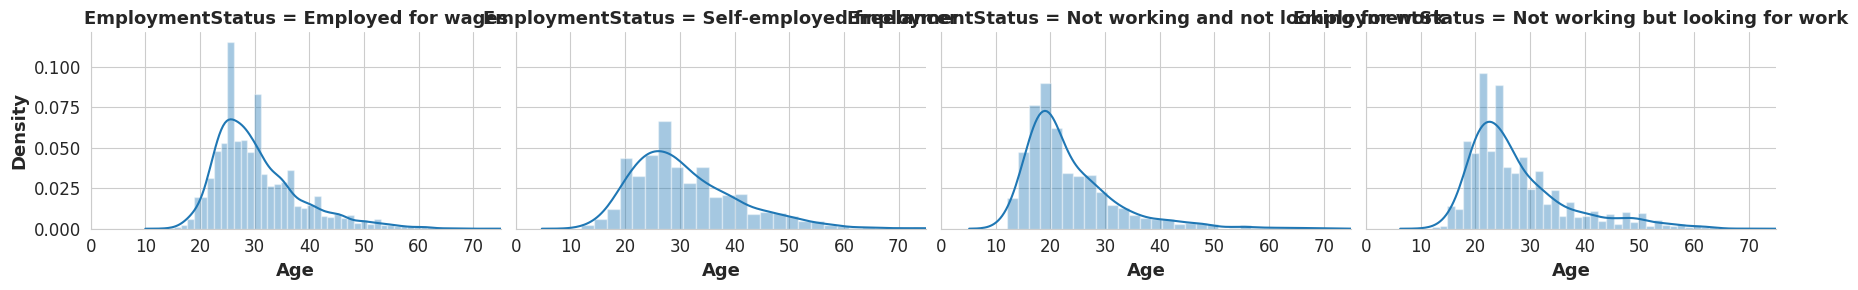

In [75]:
fig = sns.FacetGrid(new_survey_df, col='EmploymentStatus', aspect=1.5)
fig.map(sns.distplot, 'Age')
oldest = new_survey_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()